    Расчёт ветровой нагрузки по СП 20.13330.2016

In [2532]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math
from tabulate import tabulate

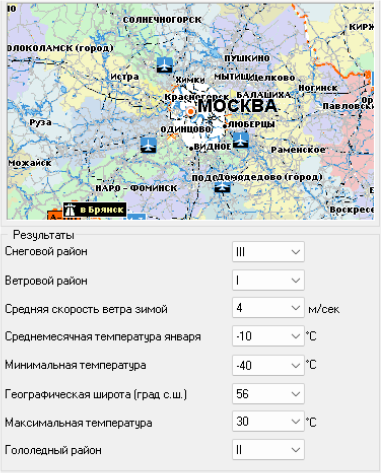

                 типы местности:

A - открытые побережья морей, озер и водохранилищ, сельские местности, в том числе с постройками высотой менее 10 м, пустыни, степи, лесостепи, тундра;

B - городские территории, лесные массивы и другие местности, равномерно покрытые препятствиями высотой более 10 м;

C - городские районы с плотной застройкой зданиями высотой более 25 м.


In [2533]:
#@title Исходные данные
#@markdown Form
wind_region = "I" #@param ["Ia", "I", "II", "III", "IV", "V", "VI", "VII"] {allow-input: true}
terrain = "B" #@param ["A", "B", "C"] {allow-input: true}
structure = "building" #@param  ["building", "tower"] {allow-input: true}
delta = 0.3 #@param [0.3, 0.15] {allow-input: true}

In [2534]:
h = 59.4 # высота здания
d = 16 # размер здания в направлении, перпендикулярном расчетному направлению ветра
a = 21.4 # размер здания в направлении расчетного ветра
z = 59.55 # высота от поверхности земли
f1 = 0.5 # Первая частота собственных колебаний
f2 = 1.5 # Вторая частота собственных колебаний
gf = 1.4 # коэффициент надёжности по нагрузке

In [2535]:
index=['Ia', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII']
table_11_1 = pd.Series([0.17, 0.23, 0.3, 0.38, 0.48, 0.6, 0.73, 0.85], index=index)
print('            Таблица 11.1')
print(tabulate (pd.DataFrame(table_11_1).transpose(), showindex=False, headers=index))

            Таблица 11.1
  Ia     I    II    III    IV    V    VI    VII
----  ----  ----  -----  ----  ---  ----  -----
0.17  0.23   0.3   0.38  0.48  0.6  0.73   0.85


In [2536]:
w0 = table_11_1[wind_region]
display(Math (r'нормативное \ значение \ ветрового \ давления \ w_0 = {0} \ кПа'.format(w0)))

<IPython.core.display.Math object>

In [2537]:
columns=['Ze', 'A', 'B', 'C']
table_11_2 = pd.DataFrame(np.array([[5.0, 0.75, 0.5, 0.4],
                                    [10.0, 1.0, 0.65, 0.4],
                                    [20.0, 1.25, 0.85, 0.55],
                                    [40.0, 1.5, 1.1, 0.8],
                                    [60.0, 1.7, 1.3, 1.0],
                                    [80.0, 1.85, 1.45, 1.15],
                                    [100.0, 2.0, 1.6, 1.25],
                                    [150.0, 2.25, 1.9, 1.55],
                                    [200.0, 2.45, 2.1, 1.8],
                                    [250.0, 2.65, 2.3, 2.0],
                                    [300.0, 2.75, 2.5, 2.2]]),
                                  columns=columns)
table_11_2 = table_11_2.set_index(['Ze'])
print('    Таблица 11.2')
print(tabulate(table_11_2, headers=columns, showindex="always"))

    Таблица 11.2
  Ze     A     B     C
----  ----  ----  ----
   5  0.75  0.5   0.4
  10  1     0.65  0.4
  20  1.25  0.85  0.55
  40  1.5   1.1   0.8
  60  1.7   1.3   1
  80  1.85  1.45  1.15
 100  2     1.6   1.25
 150  2.25  1.9   1.55
 200  2.45  2.1   1.8
 250  2.65  2.3   2
 300  2.75  2.5   2.2


In [2538]:
def zei(z, d, h):
    if structure == "building":
        if h <= z:
            ze = h
        elif d < h <= 2 * d:
            if z >= h - d:
                ze = h
            elif 0 < z < h - d:
                ze = d
            else:
               ze = z
        elif h > 2 * d:
            if z >= h - d:
                ze = h
            elif d < z < h - d:
                ze = z
            elif 0 <= z <= d:
                ze = d
            else:
              ze = z
        else:
            ze = z
    return ze

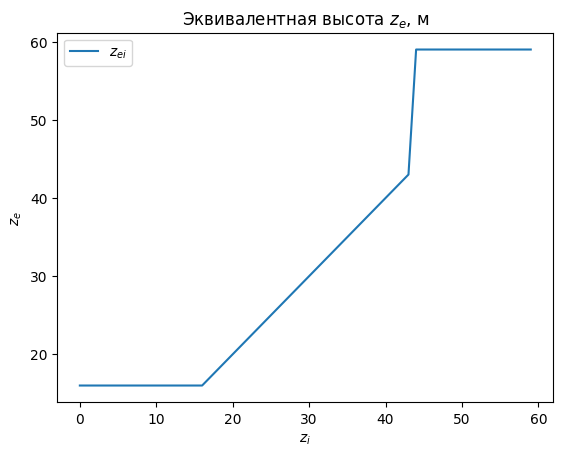

In [2539]:
zi = np.arange(0, h, 1)
vzei = np.vectorize(zei)
ze_i = vzei(zi, d, h)
plt.plot(zi, ze_i, label='$z_{ei}$')
plt.legend()
plt.xlabel('$z_i$')
plt.ylabel('$z_e$')
plt.title('Эквивалентная высота $z_e}$, м')
plt.show()
tbl = pd.DataFrame(ze_i, zi)

In [2540]:
def ki(tb, z):
    tb.index = pd.to_numeric(tb.index)
    new_index = np.unique(list(tb.index) + [z])
    new_tb = tb.reindex(new_index).interpolate(method='polynomial', order=2)
    return new_tb

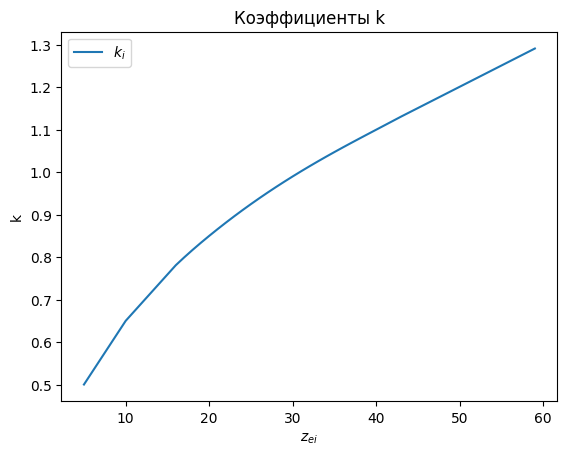

In [2541]:
tbl = table_11_2
i = 0
for z in ze_i:
  tbl = ki(tbl, z)
  i =+ 1
tb = tbl[tbl.index <= h ]
z_i = tb.index
k_i = tb[terrain]
plt.plot(z_i, k_i, label='$k_i$')
plt.legend()
plt.xlabel('$z_{ei}$')
plt.ylabel('k')
plt.title('Коэффициенты k')
plt.show()
tb = tbl[tbl.index <= h]

In [2542]:
ze = zei(z, d, h)
print("Эквивалентная высота: z\u2091= {0:.3f} м".format(ze))
k = ki(tbl, z)
#print("Коэффициент k: k= {0:.3f}".format(k))

Эквивалентная высота: zₑ= 59.400 м


Нормативное значение основной ветровой нагрузки: $w = w_m + w_p$

Нормативное значение средней составляющей основной ветровой нагрузки: $w_m = w_0*k(z_e)*c$

In [2543]:
c = 1 # аэродинамический коэффициент
wm = w0 * k_i * c

Расчетное значение ветровой нагрузки: $W(\gamma_f,w) = \gamma_f * w$

In [2544]:
columns=['Ze', 'A', 'B', 'C']
table_11_4 = pd.DataFrame(np.array([[5, 0.85, 1.22, 1.78],
                                    [10, 0.76, 1.06, 1.78],
                                    [20, 0.69, 0.92, 1.5],
                                    [40, 0.62, 0.8, 1.26],
                                    [60, 0.58, 0.74, 1.14],
                                    [80, 0.56, 0.7, 1.06],
                                    [100, 0.54, 0.67, 1.0],
                                    [150, 0.51, 0.62, 0.9],
                                    [200, 0.49, 0.58, 0.84],
                                    [250, 0.47, 0.56, 0.8],
                                    [300, 0.46, 0.54, 0.76]]),
                                  columns=columns)
table_11_4 = table_11_4.set_index(['Ze'])
print('    Таблица 11.4')
print(tabulate(table_11_4, headers=columns, showindex="always"))

    Таблица 11.4
  Ze     A     B     C
----  ----  ----  ----
   5  0.85  1.22  1.78
  10  0.76  1.06  1.78
  20  0.69  0.92  1.5
  40  0.62  0.8   1.26
  60  0.58  0.74  1.14
  80  0.56  0.7   1.06
 100  0.54  0.67  1
 150  0.51  0.62  0.9
 200  0.49  0.58  0.84
 250  0.47  0.56  0.8
 300  0.46  0.54  0.76


In [2545]:
def zetai(tb, z):
    tb.index = pd.to_numeric(tb.index)
    new_index = np.unique(list(tb.index) + [z])
    new_tb = tb.reindex(new_index).interpolate(method='polynomial', order=2)
    return new_tb

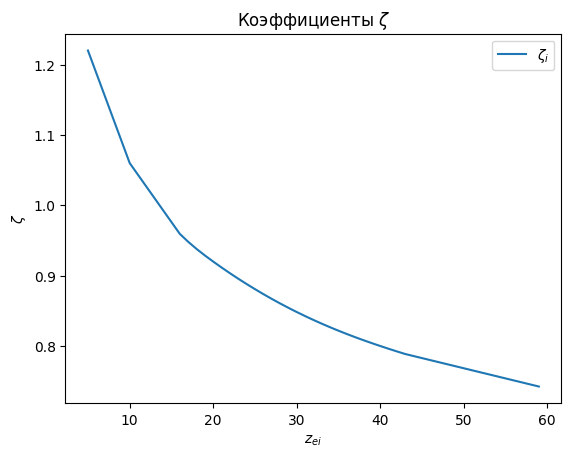

In [2546]:
tbl = table_11_4
i = 0
for z in ze_i:
  tbl = zetai(tbl, z)
  i =+ 1
tb = tbl[tbl.index <= h ]
z_i = tb.index
zeta_i = tb[terrain]
plt.plot(z_i, zeta_i, label='$\zeta_i$')
plt.legend()
plt.xlabel('$z_{ei}$')
plt.ylabel('$\zeta$')
plt.title('Коэффициенты $\zeta$')
plt.show()
tb = tbl[tbl.index <= h]

In [2547]:
display(Math (r'Логарифмический \ декремент \ колебаний \ \delta = {}'.format(delta)))
display(Math (r'Первая  \ частота \ собственных \ колебаний \ f_1 = {} \ Гц'.format(f1)))
display(Math (r'Вторая  \ частота \ собственных \ колебаний \ f_2 = {} \ Гц'.format(f2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2548]:
def vareps(k_i):
  veps = math.sqrt(w0 * k_i * gf) / (940 * f1)
  return veps
vp = list(map(vareps, k_i))

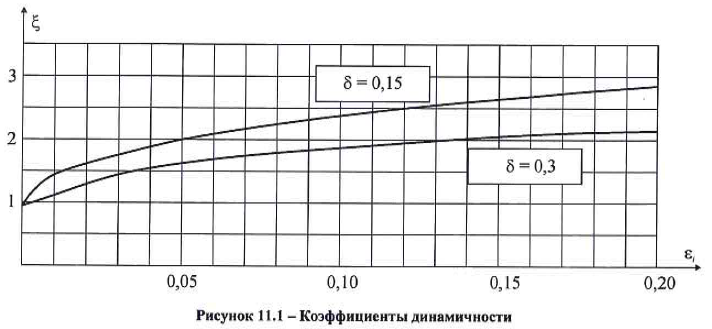

In [2549]:
xi = 1 # коэффициент динамичности
display(Math (r'Коэффициент \ динамичности \ \xi = {0:.3f}'.format(xi)))

<IPython.core.display.Math object>

    Таблица 11.1
   eps    0.15     0.3
------  ------  ------
0       0.9488  0.9488
0.0025  1.1174  0.9899
0.005   1.2614  1.031
0.0075  1.3646  1.0721
0.01    1.4376  1.1132
0.02    1.6128  1.2905
0.03    1.7525  1.4391
0.04    1.8822  1.5443
0.05    1.9982  1.6201
0.06    2.0854  1.6845
0.07    2.1619  1.7422
0.08    2.2385  1.7868
0.09    2.3071  1.823
0.1     2.3727  1.861
0.11    2.4386  1.9038
0.12    2.496   1.9467
0.13    2.5452  1.9777
0.14    2.5919  2.016
0.15    2.6384  2.0508
0.16    2.68    2.0808
0.17    2.7296  2.1057
0.18    2.7758  2.1231
0.19    2.8171  2.1326
0.2     2.8496  2.1396


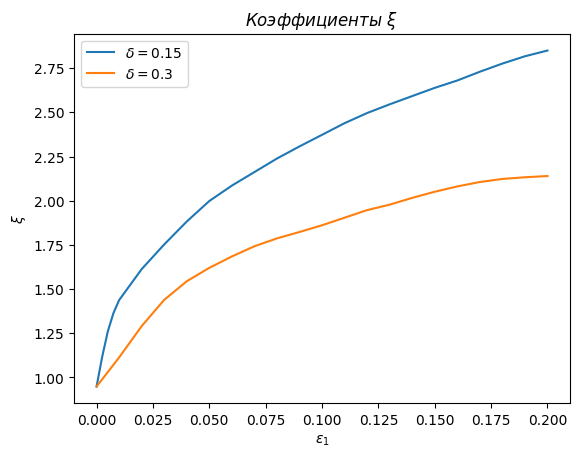

In [2550]:
columns = ['eps', '0.15', '0.3']
table_11_1 = pd.DataFrame(np.array([[0,	0.9488,	0.9488],
                                    [0.0025,	1.1174,	0.9899],
                                    [0.005,	1.2614,	1.031],
                                    [0.0075,	1.3646,	1.0721],
                                    [0.01,	1.4376,	1.1132],
                                    [0.02,	1.6128,	1.2905],
                                    [0.03,	1.7525,	1.4391],
                                    [0.04,	1.8822,	1.5443],
                                    [0.05,	1.9982,	1.6201],
                                    [0.06,	2.0854,	1.6845],
                                    [0.07,	2.1619,	1.7422],
                                    [0.08,	2.2385,	1.7868],
                                    [0.09,	2.3071,	1.823],
                                    [0.1,	2.3727,	1.861],
                                    [0.11,	2.4386,	1.9038],
                                    [0.12,	2.496,	1.9467],
                                    [0.13,	2.5452,	1.9777],
                                    [0.14,	2.5919,	2.016],
                                    [0.15,	2.6384,	2.0508],
                                    [0.16,	2.68,	2.0808],
                                    [0.17,	2.7296,	2.1057],
                                    [0.18,	2.7758,	2.1231],
                                    [0.19,	2.8171,	2.1326],
                                    [0.2,	2.8496,	2.1396],
                                    ]),
                                  columns=columns)
table_11_1 = table_11_1.set_index(['eps'])
print('    Таблица 11.1')
print(tabulate(table_11_1, headers=columns, showindex="always"))
plt.plot(table_11_1.index, table_11_1['0.15'], label=r'$\delta = 0.15$')
plt.legend()
plt.xlabel(r'$\varepsilon_1$')
plt.ylabel(r'$\xi$')
plt.plot(table_11_1.index, table_11_1['0.3'], label=r'$\delta = 0.3$')
plt.legend()
plt.ylabel(r'$\xi$')
plt.title(r'$Коэффициенты \ \xi$')
plt.show()

In [2551]:
def xii(tb, vp):
    tb.index = pd.to_numeric(tb.index)
    new_index = np.unique(list(tb.index) + [vp])
    new_tb = tb.reindex(new_index).interpolate(method='polynomial', order=2)
    return new_tb

In [2552]:
tbl = table_11_1
xi = np.zeros(len(vp))
i = 0
for v in vp:
  tbl = ki(tbl, v)
  xi[i] = tbl[str(delta)][v]
  i = i + 1
print(tabulate(tbl, headers=columns, showindex="always"))
display(Math (r'$Коэффициенты \ \xi$'))
print(xi)


        eps     0.15       0.3
-----------  -------  --------
0            0.9488   0.9488
0.000853719  1.0088   0.962836
0.00097339   1.01701  0.964804
0.00106692   1.02339  0.966341
0.00107938   1.02424  0.966546
0.00109117   1.02504  0.96674
0.00110239   1.0258   0.966924
0.00111311   1.02653  0.967101
0.00112344   1.02723  0.967271
0.00113338   1.02791  0.967434
0.00114296   1.02856  0.967592
0.0011522    1.02919  0.967743
0.00116111   1.02979  0.96789
0.0011697    1.03037  0.968031
0.00117801   1.03093  0.968168
0.00118603   1.03148  0.9683
0.00119378   1.032    0.968427
0.00120129   1.03251  0.96855
0.00120856   1.033    0.96867
0.00121562   1.03348  0.968786
0.00122247   1.03394  0.968899
0.00122913   1.03439  0.969008
0.00123563   1.03483  0.969115
0.00124197   1.03526  0.969219
0.00124819   1.03568  0.969321
0.00125429   1.03609  0.969422
0.00126031   1.03649  0.969521
0.00126627   1.03689  0.969619
0.00127221   1.03729  0.969716
0.00127813   1.03769  0.969814
0.00128402   1.0

<IPython.core.display.Math object>

[0.96283625 0.9648037  0.96634144 0.96654617 0.96674009 0.96692443
 0.96710081 0.96727052 0.96743398 0.96759151 0.96774336 0.96788983
 0.96803117 0.96816764 0.96829951 0.96842701 0.96855042 0.96866998
 0.96878595 0.96889858 0.96900816 0.96911497 0.96921928 0.96932143
 0.96942176 0.96952066 0.96961872 0.96971638 0.96981366 0.96991052
 0.97135497]


In [2553]:
columns=['region', '0.3', '0.15']
table_11_5 = pd.DataFrame(np.array([["Ia", 0.85, 2.6],
                                    ["I", 0.95, 2.9],
                                    ["II", 1.1, 3.4],
                                    ["III", 1.2, 3.8],
                                    ["IV", 1.4, 4.3],
                                    ["V", 1.6, 5.0],
                                    ["VI", 1.7, 5.6],
                                    ["VII", 1.9, 5.9]]),
                                  columns=columns)
table_11_5 = table_11_5.set_index(['region'])
print('    Таблица 11.5')
print(tabulate(table_11_5, headers=columns, showindex="always"))

    Таблица 11.5
region      0.3    0.15
--------  -----  ------
Ia         0.85     2.6
I          0.95     2.9
II         1.1      3.4
III        1.2      3.8
IV         1.4      4.3
V          1.6      5
VI         1.7      5.6
VII        1.9      5.9


In [2554]:
flim = float(table_11_5[str(delta)][wind_region])
display(Math (r'Предельное  \ значение \ собственной \ частоты \ f_l = {0:.3f} \ Гц'.format(flim)))

<IPython.core.display.Math object>

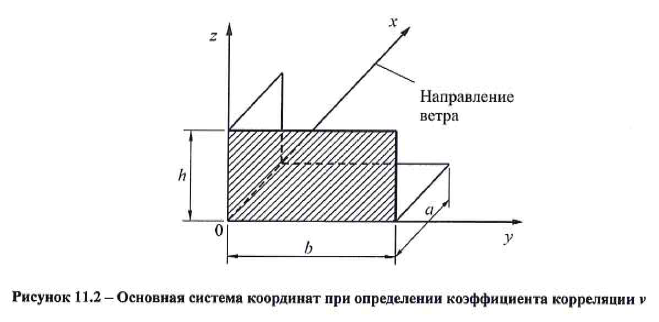

In [2555]:
#@title Расчётная поверхность
#@markdown Form
xyz = "z0y" #@param ["z0y", "z0x", "x0y"] {allow-input: true}

In [2556]:
def x_y_z():
  b = d
  if xyz == 'z0y':
    rho = b
    chi = h
  elif xyz == 'z0x':
    rho = 0.4 * a
    chi = h
  else:
    rho = b
    chi = a
  return rho, chi

In [2557]:
rho, chi = x_y_z()
display(Math (r'Размер \ \rho = {} \ м'.format(rho)))
display(Math (r'Размер \ \chi = {} \ м'.format(chi)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2558]:
columns=['rho', '5', '10', '20', '40', '80', '160', '350']
table_11_6 = pd.DataFrame(np.array([[0.1, 0.95, 0.92, 0.88, 0.83, 0.76, 0.67, 0.56],
                                    [5.0, 0.89, 0.87, 0.84, 0.8, 0.73, 0.65, 0.54],
                                    [10.0, 0.85, 0.84, 0.81, 0.77, 0.71, 0.64, 0.53],
                                    [20.0, 0.8, 0.78, 0.76, 0.73, 0.68, 0.61, 0.51],
                                    [40.0, 0.72, 0.72, 0.7, 0.67, 0.63, 0.57, 0.48],
                                    [80.0, 0.63, 0.63, 0.61, 0.59, 0.56, 0.51, 0.44],
                                    [160.0, 0.53, 0.53, 0.52, 0.5, 0.47, 0.44, 0.38]]),
                                  columns=columns)
table_11_6 = table_11_6.set_index(['rho'])
print('    Таблица 11.6')
print(tabulate(table_11_6, headers=columns, showindex="always"))

    Таблица 11.6
  rho     5    10    20    40    80    160    350
-----  ----  ----  ----  ----  ----  -----  -----
  0.1  0.95  0.92  0.88  0.83  0.76   0.67   0.56
  5    0.89  0.87  0.84  0.8   0.73   0.65   0.54
 10    0.85  0.84  0.81  0.77  0.71   0.64   0.53
 20    0.8   0.78  0.76  0.73  0.68   0.61   0.51
 40    0.72  0.72  0.7   0.67  0.63   0.57   0.48
 80    0.63  0.63  0.61  0.59  0.56   0.51   0.44
160    0.53  0.53  0.52  0.5   0.47   0.44   0.38


In [2559]:
col = columns.copy()
col.pop(0)
chi_i = list(map(int, col))
n1 = str(max(filter(lambda x: x < chi, chi_i), default=None))
n2 = str(min(filter(lambda x: x > chi, chi_i), default=None))

In [2560]:
def chii(tb, rho):
    tb.index = pd.to_numeric(tb.index)
    new_index = np.unique(list(tb.index) + [rho])
    new_tb = tb.reindex(new_index).interpolate(method='polynomial', order=2)
    return new_tb

In [2561]:
tb = table_11_6
ntb1 = chii(tb, rho)[n1][rho]
ntb2 = chii(tb, rho)[n2][rho]
v = (ntb1 + ntb2)/2
display(Math (r'Коэффициент \ корреляции \ \nu = {0:.3f}'.format(v)))


<IPython.core.display.Math object>

Нормативное значение пульсационной составляющей основной ветровой нагрузки: $w_p = w_m*\zeta(z_e)*\nu$ при $f_1$ > $f_{lim}$
Нормативное значение пульсационной составляющей основной ветровой нагрузки:
$w_p = w_m*\xi*\zeta(z_e)*\nu$ при $f_1$ < $f_{lim}$ < $f_2$

In [2562]:
def chart():
  if f2 > flim:
    plt.plot(z_i, wm, label='$w_{mi}$')
    plt.plot(z_i, wp, label='$w_{pi}$')
    plt.plot(z_i, wm + wp, label='$w_i$')
  else:
    plt.plot(z_i, wm, label='$w_{mi}$')
  plt.legend()
  plt.xlabel('$z_{ei}$')
  plt.ylabel('w')
  plt.title('Нормативная основная ветровая нагрузка w, кПа')
  plt.show()

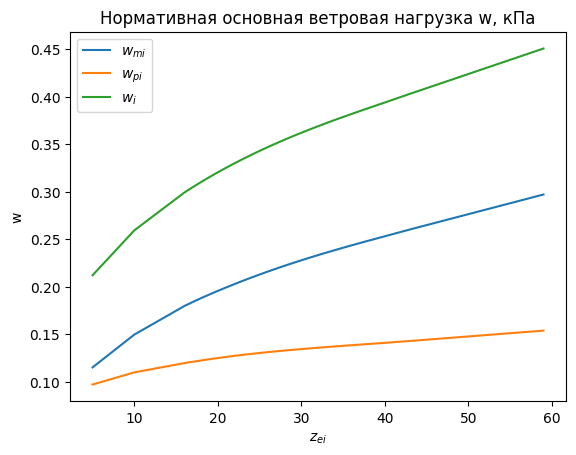

  Ze         w
----  --------
   5  0.211937
  10  0.259215
  16  0.299103
  17  0.304723
  18  0.310121
  19  0.315315
  20  0.320321
  21  0.32515
  22  0.32981
  23  0.33431
  24  0.338657
  25  0.342859
  26  0.346922
  27  0.350856
  28  0.354667
  29  0.358363
  30  0.361952
  31  0.365441
  32  0.36884
  33  0.372155
  34  0.375396
  35  0.378571
  36  0.381691
  37  0.384764
  38  0.387802
  39  0.390817
  40  0.393829
  41  0.39685
  42  0.399882
  43  0.402923
  59  0.450632


In [2563]:
if f1 > flim:
  wp = wm * zeta_i * v
  tw = pd.DataFrame(wm.values + wp.values, index=z_i)
elif f1 < flim < f2:
  wp = wm * xi * zeta_i * v
  tw = pd.DataFrame(wm.values + wp.values, index=z_i)
else:
  tw = pd.DataFrame(wm.values, index=z_i)
  print('Необходимо производить динамический расчёт для определения wp !')
chart()
print(tabulate(tw, headers=['Ze', 'w'], showindex="always"))